Part I
---


| Var | (a, sigma^2) | n | q | k | Rule | Law |
| --- | --- | --- | --- | --- | --- | --- |
| 5 | (0;9) | 60 | 1.75 | 3 | Стерджеса | Треугольное на отрезке (-2, 4) и модой, равной 1 |


In [33]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
import pandas as pd
import math
import statistics

# consts
n = 60
a = 0
sigma = 3
q = 1.75

left = -2
right = 4
mode = 1

my_c = (mode - left)/(right-left)
my_loc = left
my_scale = right-left

Task 1


In [34]:
sample = sts.norm.rvs(loc=a, scale=sigma, size=n)
print(sample)

[-1.08171735  2.32041756  1.70542715 ... -0.79697181 -6.11740306
 -1.12036541]


In [35]:
n_intervals = int(1 + 3.32*math.log10(n))+1
min_smpl = math.floor(sample.min())
max_smpl = math.ceil(sample.max())
h = (max_smpl-min_smpl)/n_intervals

print(f"Количество интервалов: {n_intervals}\nДлина интервала: {h}\nМаксимальный: {max_smpl}\nМинимальный элемент: {min_smpl} ")

Количество интервалов: 14
Длина интервала: 1.6428571428571428
Максимальный: 12
Минимальный элемент: -11 


In [36]:
intervals = []
for i in range(0, n_intervals):
    print(f'{i+1} interval: {min_smpl+i*h} - {min_smpl+(i+1)*h}')
    intervals.append(min_smpl+i*h)
intervals.append(min_smpl+n_intervals*h)

1 interval: -11.0 - -9.357142857142858
2 interval: -9.357142857142858 - -7.714285714285714
3 interval: -7.714285714285714 - -6.071428571428571
4 interval: -6.071428571428571 - -4.428571428571429
5 interval: -4.428571428571429 - -2.7857142857142865
6 interval: -2.7857142857142865 - -1.1428571428571423
7 interval: -1.1428571428571423 - 0.5
8 interval: 0.5 - 2.1428571428571423
9 interval: 2.1428571428571423 - 3.7857142857142847
10 interval: 3.7857142857142847 - 5.428571428571427
11 interval: 5.428571428571427 - 7.071428571428569
12 interval: 7.071428571428569 - 8.714285714285715
13 interval: 8.714285714285715 - 10.357142857142858
14 interval: 10.357142857142858 - 12.0


In [37]:
frequency = []
arraySort = list(sample)
arraySort.sort()
for i in range(0, len(intervals)-1):
    frequency.append(0)
    for j in arraySort:
        if j >= intervals[i] and j <= intervals[i+1]:
            frequency[i] += 1
for i in range(0, len(frequency)):
    print(f'{i+1} interval: {frequency[i]}')
frequency = np.array(frequency)

print(f'\nСумма частот - {(frequency/n).sum()}')



1 interval: 5
2 interval: 33
3 interval: 92
4 interval: 309
5 interval: 653
6 interval: 1028
7 interval: 1296
8 interval: 1173
9 interval: 783
10 interval: 418
11 interval: 158
12 interval: 41
13 interval: 9
14 interval: 2

Сумма частот - 0.9999999999999999


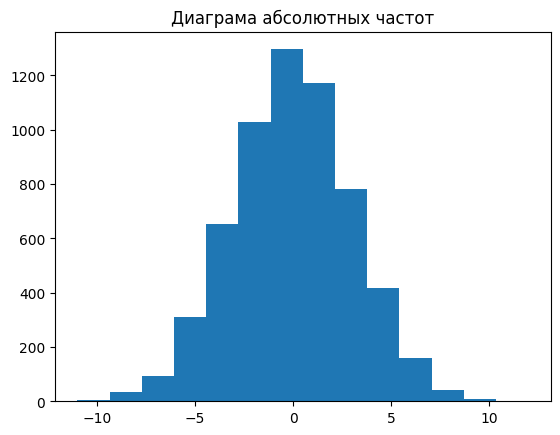

In [38]:
plt.title("Диаграма абсолютных частот")
plt.stairs(frequency, intervals, fill=True)

In [39]:
my_pdf = frequency/(h*n)
for i in range(0, len(my_pdf)):
    print(f'{i+1} interval: {my_pdf[i]}')
# print(f'Сумма абсолютных частот {tmp.sum()}')

1 interval: 0.0005072463768115942
2 interval: 0.0033478260869565218
3 interval: 0.009333333333333334
4 interval: 0.03134782608695652
5 interval: 0.0662463768115942
6 interval: 0.10428985507246377
7 interval: 0.1314782608695652
8 interval: 0.11900000000000001
9 interval: 0.07943478260869566
10 interval: 0.042405797101449275
11 interval: 0.016028985507246376
12 interval: 0.004159420289855073
13 interval: 0.0009130434782608696
14 interval: 0.00020289855072463768


[0.00050725 0.00334783 0.00933333 0.03134783 0.06624638 0.10428986
 0.13147826 0.119      0.07943478 0.0424058  0.01602899 0.00415942
 0.00091304 0.0002029 ]
0.6086956521739131


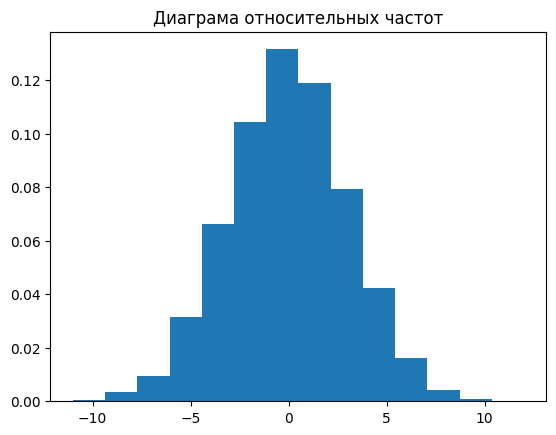

In [40]:
plt.title("Диаграма относительных частот")
plt.stairs(my_pdf, intervals, fill=True)
print(my_pdf)
print(my_pdf.sum())

Task 2

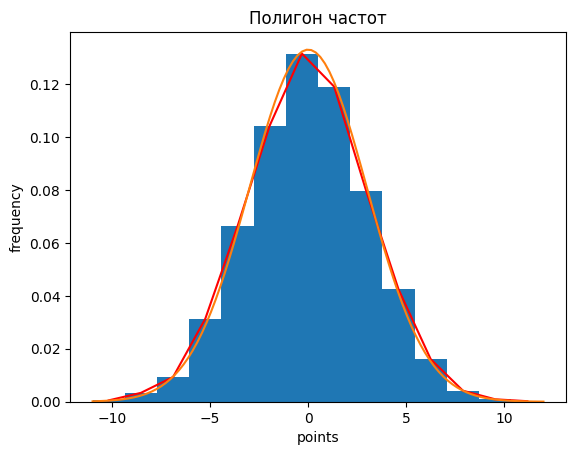

In [41]:
lineY = []
for i in my_pdf:
    lineY.append(i)
lineX = []
for i in range(0, len(intervals)-1):
    lineX.append(intervals[i]+h/2)
plt.stairs(my_pdf, intervals, fill=True)
plt.plot(lineX, lineY, color="red")

x = np.linspace(min_smpl, max_smpl, 100)
plt.plot(x, sts.norm.pdf(x, a, sigma))

plt.title('Полигон частот')
plt.xlabel('points')
plt.ylabel('frequency')
plt.show()

In [42]:
# check
proof = 0 
for i in frequency/n/h:
    proof+=i*h
print("Сумма площадей под графиком: ", proof)

Сумма площадей под графиком:  0.9999999999999999


Function graph

In [43]:
arrayGraph = []
tmp1= frequency/n
for i in range(0, len(tmp1)):
    arrayGraph.append(0)
    for j in range (0, i):
        arrayGraph[i]+=tmp1[j]
cdfY = []
for i in arrayGraph:
    cdfY.append(i)
cdfY.append(1)
cdfX = []
for i in intervals:
    cdfX.append(i)


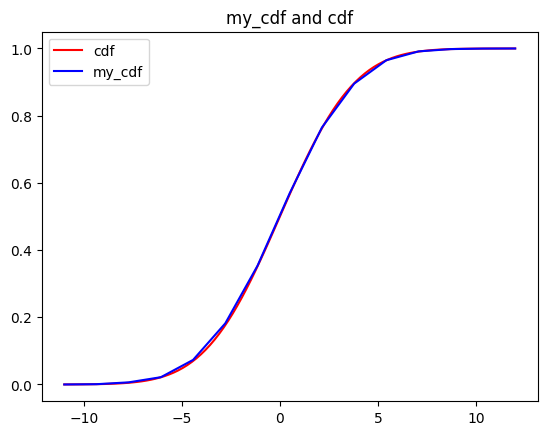

In [44]:
# fig, ax = plt.subplots()
# for i in range(0, len(arrayGraph)):
#     ax.hlines(y=arrayGraph[i], xmin=intervals[i], xmax=intervals[i+1], linewidth=2, color='r')
    
# ax.hlines(y=1, xmin=intervals[len(intervals)-1], xmax=intervals[len(intervals)-1]+10, linewidth=2, color='r')
# ax.hlines(y=0, xmin=intervals[0]-10, xmax=intervals[0], linewidth=2, color='r')
# plt.plot(x, sts.norm.cdf(x, a, sigma))
# ---------------------------------------------------


x = np.linspace(min_smpl, max_smpl, 100)
plt.plot(x, sts.norm.cdf(x, a, sigma), color="red")

plt.plot(cdfX, cdfY, color="blue")
plt.legend(['cdf', 'my_cdf'])
plt.title("my_cdf and cdf")
plt.show()

,X
0.25,-2.085045
0.50,-0.026939
0.75,1.980981


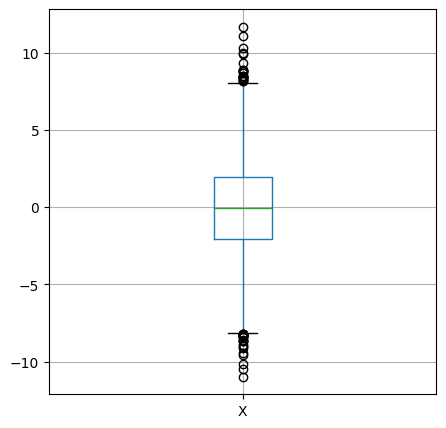

In [45]:
df = pd.DataFrame(data=sample,columns=['X'])
df.boxplot(figsize = (5, 5))
df.quantile([0.25,0.5,0.75])

part 3


In [46]:
print(q)
print(f"Вероятность по таблице {0.04599*2}")
print(f"Вероятность по lib {sts.laplace(scale=sigma).pdf(q)}")
prob = 0
for i in sample:
    if i>-q and i<q:
        prob+=1
prob/=n
print(f"Статистическая {prob}")


1.75
Вероятность по таблице 0.09198
Вероятность по lib 0.09300585762834118
Статистическая 0.4365


In [47]:
tem1 = frequency/n
sample 

my_mean = statistics.mean(sample)
my_variacne = statistics.variance(sample)
my_dev = math.sqrt(my_variacne)
my_skewness = sts.skew(sample)
my_kurtosis = sts.kurtosis(sample)
print(f'mean - {my_mean}, \nvariacne - {my_variacne}, \ndev - {my_dev}, \nSkewness - {my_skewness}, \nKurtosis - {my_kurtosis}')


mean - -0.03744272545180262, 
variacne - 9.117601552184786, 
dev - 3.0195366452793357, 
Skewness - -0.004470086702477854, 
Kurtosis - -0.01105484028597603


In [48]:
X = sample.sum()/len(sample)
print(f'Первый эмпирический момент: {X}')
s2 = 0
for i in sample:
    s2 += (i-X)**2
s2 = s2/len(sample)
print(f'Эмпирическая дисперсия: {s2}')
print(f'Стандартное отклонение: {math.sqrt(s2)}')

x4 = 0
s3 = 0
s4 = 0
for i in sample:
    x4 += math.pow(i, 4)
    s3 += math.pow((i-X), 3)
    s4 += math.pow((i-X), 4)
x4 /= len(sample)
s3 /= len(sample)
s4 /= len(sample)
print(f'Коэффициент ассимметрии: {s3/math.pow(math.sqrt(s2), 3)}')
print(f'Коэффициент эксцесса: {s4/math.pow(s2, 2)-3}')

Первый эмпирический момент: -0.03744272545180261
Эмпирическая дисперсия: 9.11608195192609
Стандартное отклонение: 3.0192850067401866
Коэффициент ассимметрии: -0.00447008670247787
Коэффициент эксцесса: -0.01105484028597603


Part II
---
